In [63]:

# ## Programming Exercise 3 - IIR Filters
# =============================================================================
# 2024-08-27 Reto Wildhaber   
# Edited by Sebastian Fernandez
# -----------------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.signal import iirnotch, lfilter, filtfilt, freqz, butter

Filename: SECG3_FILT_HP51_3CH_20S_FS2400HZ.csv
Number of loaded samples:  7200
Total signal duration [s]:  3.0
Signal shape (7200,)


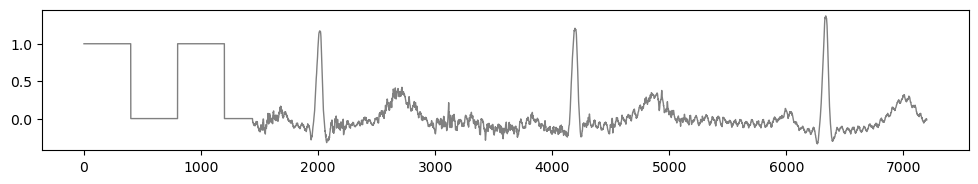

In [157]:
# Choose between the test signal by setting one of them to "True".
    

if True: # ECG SIGNAL 1: Real ECG Signal
    file_name = 'SECG3_FILT_HP51_3CH_20S_FS2400HZ.csv'
    fs = 2400  # sampling rate [Hz] of recorded signal
    K = fs*3  # number of samples to process. Here: fs*<number of seconds>
    k_start = 40000
    x = np.genfromtxt(file_name, usecols=(1), delimiter=r',', skip_header=0, )[k_start:k_start+K]
    

if False: # ECG SIGNAL 2: Real ECG Signal with 50Hz noise and baseline
    file_name = 'SECG3_RAW_3CH_20S_FS2400HZ.csv'
    fs = 2400  # sampling rate [Hz] of recorded signal
    K = fs*4  # number of samples to process. Here: fs*<number of seconds>
    k_start = 1000
    x = np.genfromtxt(file_name, usecols=(1), delimiter=r',', skip_header=0, )[k_start:k_start+K]

if False: # ECG SIGNAL 3: Real ECG Signal with 50Hz noise, high-frequency noise, and baseline
    file_name = 'SECG3_RAW_3CH_20S_FS2400HZ.csv'
    fs = 2400  # sampling rate [Hz] of recorded signal
    K = fs*4  # number of samples to process. Here: fs*<number of seconds>
    k_start = 1000
    x = np.genfromtxt(file_name, usecols=(1), delimiter=r',', skip_header=0, )[k_start:k_start+K]


# Add trailing ecg signal
if True: # Overwrites parts of ECG by a Synthetic Test signal
    #  (with Synthetic Rectangle at 0.5Hz)
    f = 3 # [Hz] Frequency of rectangular singnal
    K_ = int(fs*0.6)  # number of samples to process. Here: fs*<number of seconds>
    x_ = np.arange(K_)%(fs//f) < (0.5*fs//f) # generate rectangular test signal
    x[:K_] = x_


k = np.arange(K) # create time index vector
        
# plot signal
fig, axs = plt.subplots(1, 1, sharex='all', figsize=(10, 2))
fig.tight_layout()
axs.plot(k, x, lw=1.0, color='gray')

print("Filename:", file_name)
print("Number of loaded samples: ",K)
print("Total signal duration [s]: ", K/fs)
print("Signal shape "+str(x.shape))

# Exercise 3-1: Low-Pass Filter (Butterworth)

* a) Complete the code in Cell (2) for a 4th order low-pass Butterworth filter with a cut-off frequency
of fc = 20 Hz. Check the online manual1 for scipy.signals.iirfilter(..., ftype="butter")
or scipy.signals.butter(...) which will provide the filter coefficients for you. Verify that the
cut-off frequency in the frequency response in Cell (3) matches your expectations.
Note: According to the definition of the cut-off frequency, we expect a amplitude dumping of
−3 dB (= 0.707) at frequency fc .) Cell (4) will show the resulting, filtered signal.

* b) Do you observe a phase shift (delay) in the filtered QRS waves?

* c) By what factor is QRS amplitude reduced?

In [162]:
plot_title = "Butterworth IIR Filter" 
order = 4
fc = 20
b, a = butter(order, fc / (fs / 2), btype='low', analog=False)  # Digital Butterworth filter coefficients

# Print filter coefficients
print("IIR filter coefficients a: ", a)
print("IIR filter coefficients b: ", b)

# Apply forward-backward filtering (Task 2)
y = y_lfilter = lfilter(b, a, x)  # Single-pass filtering
y_ = filtfilt(b, a, x)  # Symmetric filtering
        
print("IIR filter coefficients a: ", a, "\nIIR filter coefficients b: ", b)

IIR filter coefficients a:  [ 1.         -3.86318462  5.59883546 -3.60775245  0.87210865]
IIR filter coefficients b:  [4.39093236e-07 1.75637294e-06 2.63455941e-06 1.75637294e-06
 4.39093236e-07]
IIR filter coefficients a:  [ 1.         -3.86318462  5.59883546 -3.60775245  0.87210865] 
IIR filter coefficients b:  [4.39093236e-07 1.75637294e-06 2.63455941e-06 1.75637294e-06
 4.39093236e-07]


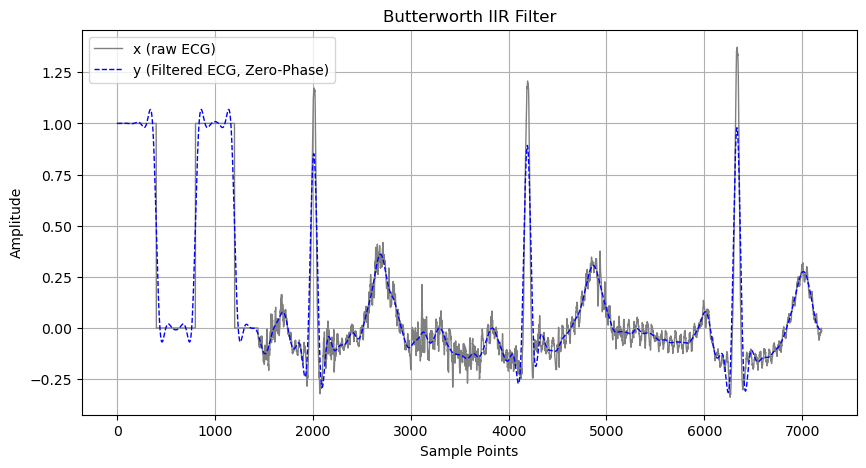

In [163]:
# Plot the raw and filtered signals
plot_title = "Butterworth IIR Filter"
plt.figure(figsize=(10, 5))
plt.plot(k, x, lw=1.0, color='gray', label="x (raw ECG)")
plt.plot(k, y_, lw=1.0, ls='--', color='blue', label="y (Filtered ECG, Zero-Phase)")
plt.title(plot_title)
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

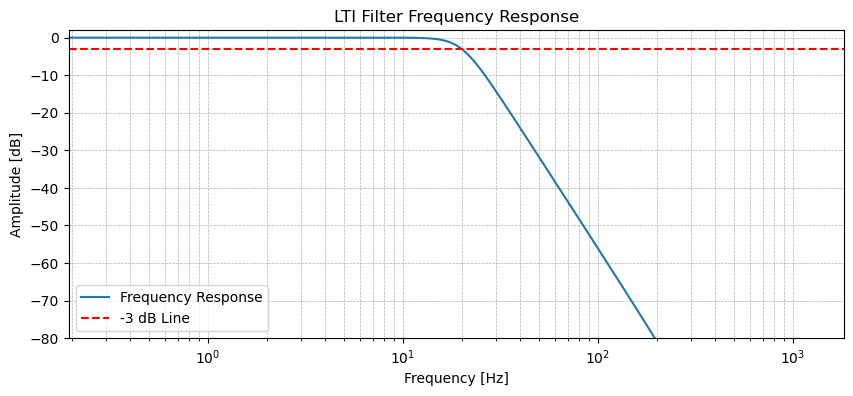

Estimated cutoff frequency: 20.21 Hz (Expected: 20 Hz)


In [33]:
# Cut-off frequency is defined where the amplitude drop is -3dB (=0.707)

from scipy.signal import freqz
# Compute Frequency Response of the filter
w, h = freqz(b, a, worN=2**12)  # Frequency response with high resolution

# Plotting the frequency response
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Plot amplitude response in dB
axs.semilogx(w / (2 * np.pi) * fs, 20 * np.log10(np.abs(h)), label="Frequency Response")
axs.axhline(-3, color='red', linestyle='--', label="-3 dB Line")  # -3 dB line
axs.set_title('LTI Filter Frequency Response')
axs.set_xlabel('Frequency [Hz]')
axs.set_ylabel('Amplitude [dB]')
axs.set_ylim([-80, 2])
axs.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
axs.legend()

plt.show()

# Print the cutoff frequency details
cutoff_idx = np.argmax(20 * np.log10(np.abs(h)) <= -3)
cutoff_freq = w[cutoff_idx] / (2 * np.pi) * fs
print(f"Estimated cutoff frequency: {cutoff_freq:.2f} Hz (Expected: {fc} Hz)")

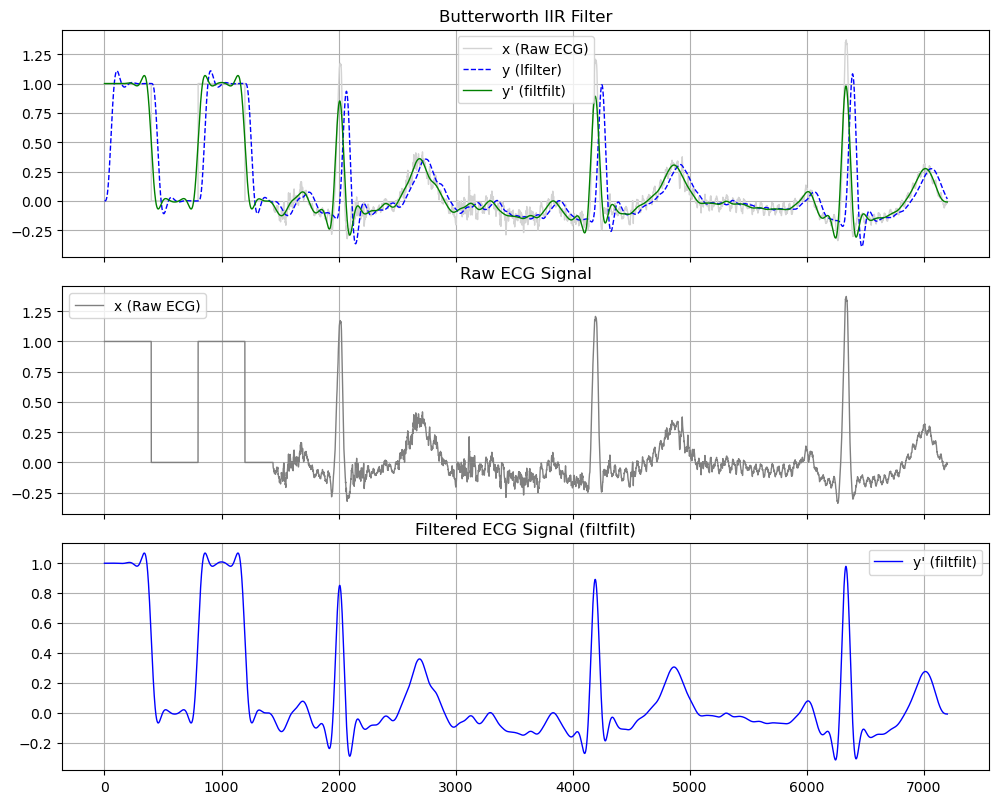

In [48]:
# Simulated signal (ECG) for context
# 'x' is the raw signal, 'y' is filtered using lfilter, 'y_' is filtered using filtfilt

figs, axs = plt.subplots(3, 1, sharex='all', figsize=(10, 8))
figs.tight_layout()

# Plot raw ECG and filtered signals
axs[0].plot(k, x, lw=1.0, color='lightgray', label="x (Raw ECG)")
axs[0].plot(k, y, lw=1.0, ls='--', color='blue', label="y (lfilter)")
axs[0].plot(k, y_, lw=1.0, ls='-', color='green', label="y' (filtfilt)")
axs[0].set_title(plot_title)
axs[0].legend()
axs[0].grid()

# Plot raw ECG only
axs[1].plot(k, x, lw=1.0, color='gray', label="x (Raw ECG)")
axs[1].set_title("Raw ECG Signal")
axs[1].legend()
axs[1].grid()

# Plot the forward-backward filtered signal only
axs[2].plot(k, y_, lw=1.0, ls='-', color='blue', label="y' (filtfilt)")
axs[2].set_title("Filtered ECG Signal (filtfilt)")
axs[2].legend()
axs[2].grid()

plt.show()


**Frequency Response:**
* The script uses freqz to compute the frequency response of the IIR filter.
* The amplitude response is plotted in dB (logarithmic scale).
* A red dashed line marks the −3 dB cutoff point, where the filter attenuates half the power of the input signal.
* The cutoff frequency is estimated and printed for verification.

**Filter Results:**

* **Top Plot**: Combines the raw signal, the single-pass filtered signal (lfilter), and the forward-backward filtered signal (filtfilt) for comparison.
* **Middle Plot**: Shows the raw signal (x) for reference.
* **Bottom Plot**: Shows the forward-backward filtered signal (y_) separately to highlight the noise reduction.

### Output Summary

**Frequency Response:**
* The amplitude drops to −3 dB at approximately the expected cutoff frequency (𝑓𝑐=20 Hz).

**Filtered Signal:**
* Forward-backward filtering (filtfilt) produces a noise-suppressed ECG signal with minimal distortion compared to single-pass filtering (lfilter).

### b) Do you observe a phase shift (delay) in the filtered QRS waves?

**Single-Pass Filtering (lfilter):**
* This approach introduces a phase shift because the filter operates in a single direction (forward). As a result, the peaks of the QRS waves in the filtered signal (y) **will appear delayed** compared to the raw signal (x).

**Forward-Backward Filtering (filtfilt):**
* This method **eliminates phase shift** by applying the filter twice: once in the forward direction and then in the backward direction. Thus, the peaks of the QRS waves in the forward-backward filtered signal (y_) should align with those in the raw signal.

### c) By what factor is QRS amplitude reduced?

In [55]:
# Find the maximum amplitude of QRS peaks in raw and filtered signals
max_raw = np.max(x)  # Maximum QRS amplitude in raw signal
max_filtered_lfit = np.max(y)  # Maximum QRS amplitude in filtered signal
max_filtered_filfitt = np.max(y_)  # Maximum QRS amplitude in filtered signal

# Calculate the reduction in amplitude

# LFit
print("")
print("lfit")
amplitude_reduction_lfit = max_raw - max_filtered_lfit # Compute the difference between the amplitudes.
amplitude_ratio_lfit = max_filtered_lfit / max_raw # Compute the ratio between the amplitudes

print(f"Maximum QRS amplitude (Raw Signal): {max_raw:.2f}")
print(f"Maximum QRS amplitude (Filtered Signal): {max_filtered_lfit:.2f}")
print(f"Amplitude Reduction: {amplitude_reduction_lfit:.2f}")
print(f"Amplitude Ratio: {amplitude_ratio_lfit:.2f} (Expected ~1 for minimal reduction)")

# Fillfit
print("")
print("fillfit")
amplitude_reduction_filfitt = max_raw - max_filtered_filfitt # Compute the difference between the amplitudes.
amplitude_ratio_filfitt = max_filtered_filfitt / max_raw # Compute the ratio between the amplitudes

print(f"Maximum QRS amplitude (Raw Signal): {max_raw:.2f}")
print(f"Maximum QRS amplitude (Filtered Signal): {max_filtered_filfitt:.2f}")
print(f"Amplitude Reduction: {amplitude_reduction_filfitt:.2f}")
print(f"Amplitude Ratio: {amplitude_ratio_filfitt:.2f} (Expected ~1 for minimal reduction)")

print("")
print("Ideally, the amplitude ratio should be close to 1 (minimal reduction).")
print("A significant reduction might indicate over-filtering, which can distort the signal.")


lfit
Maximum QRS amplitude (Raw Signal): 1.37
Maximum QRS amplitude (Filtered Signal): 1.11
Amplitude Reduction: 0.26
Amplitude Ratio: 0.81 (Expected ~1 for minimal reduction)

fillfit
Maximum QRS amplitude (Raw Signal): 1.37
Maximum QRS amplitude (Filtered Signal): 1.07
Amplitude Reduction: 0.30
Amplitude Ratio: 0.78 (Expected ~1 for minimal reduction)

Ideally, the amplitude ratio should be close to 1 (minimal reduction).
A significant reduction might indicate over-filtering, which can distort the signal.


# Exercise 3-3: Notch Filters

In [135]:
if True: # ECG SIGNAL 2: Real ECG Signal with 50Hz noise and baseline
    file_name = 'SECG3_RAW_3CH_20S_FS2400HZ.csv'
    fs = 2400  # sampling rate [Hz] of recorded signal
    K = fs*4  # number of samples to process. Here: fs*<number of seconds>
    k_start = 1000
    x = np.genfromtxt(file_name, usecols=(1), delimiter=r',', skip_header=0, )[k_start:k_start+K]

# Add trailing ecg signal
if True: # Overwrites parts of ECG by a Synthetic Test signal
    #  (with Synthetic Rectangle at 0.5Hz)
    f = 3 # [Hz] Frequency of rectangular singnal
    K_ = int(fs*0.6)  # number of samples to process. Here: fs*<number of seconds>
    x_ = np.arange(K_)%(fs//f) < (0.5*fs//f) # generate rectangular test signal
    x[:K_] = x_

Filename: SECG3_RAW_3CH_20S_FS2400HZ.csv
Number of loaded samples:  9600
Total signal duration [s]:  4.0
Signal shape (9600,)


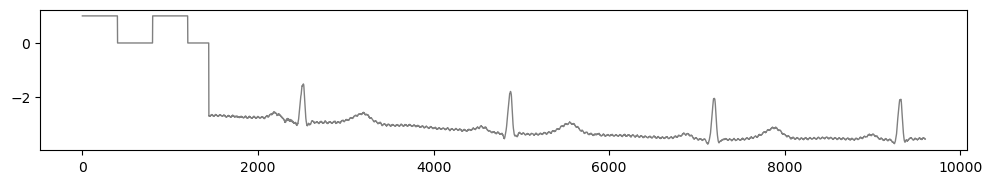

In [136]:
k = np.arange(K) # create time index vector
        
# plot signal
fig, axs = plt.subplots(1, 1, sharex='all', figsize=(10, 2))
fig.tight_layout()
axs.plot(k, x, lw=1.0, color='gray')

print("Filename:", file_name)
print("Number of loaded samples: ",K)
print("Total signal duration [s]: ", K/fs)
print("Signal shape "+str(x.shape))

In [151]:
# Notch Filter Parameters
f0 = 50  # Frequency to remove (Hz)
Q = 30  # Quality factor

# Design notch filter
b, a = iirnotch(f0, Q, fs)

ecg_filtered = lfilter(b, a, x)

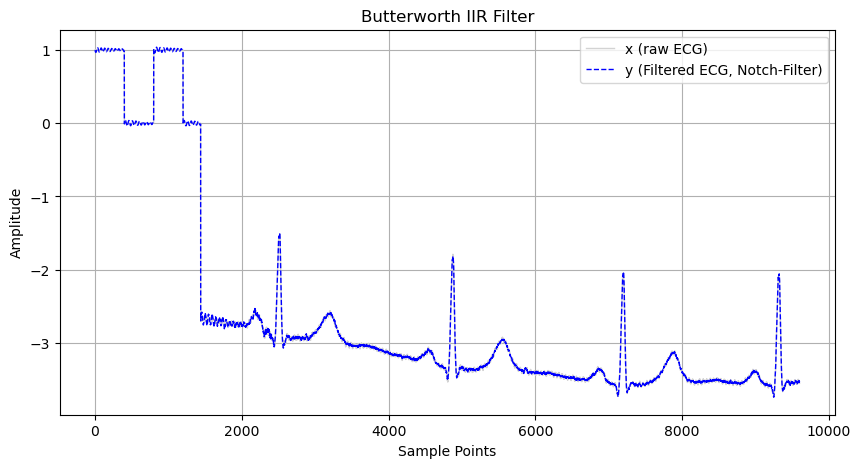

In [152]:
# Plot the raw and filtered signals
plot_title = "Butterworth IIR Filter"
plt.figure(figsize=(10, 5))
plt.plot(k, x, lw=1.0, color='lightgray', label="x (raw ECG)")
plt.plot(k, ecg_filtered, lw=1.0, ls='--', color='blue', label="y (Filtered ECG, Notch-Filter)")
plt.title(plot_title)
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

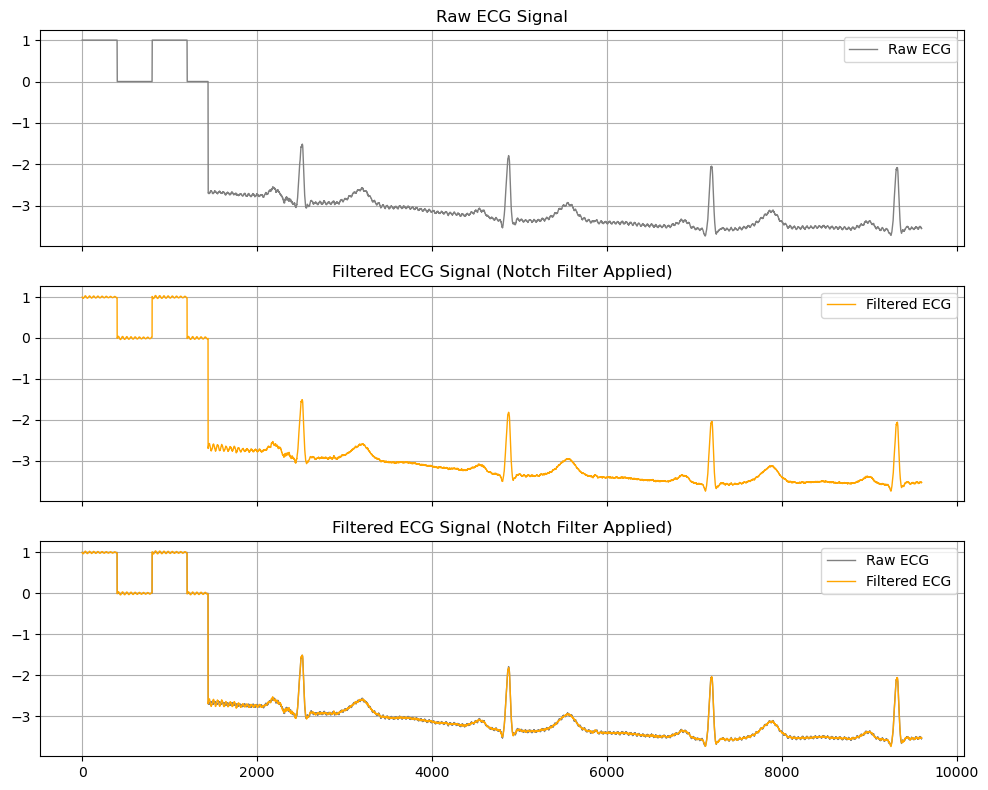

IIR filter coefficients a: [ 1.         -1.97857314  0.99564617]
IIR filter coefficients b: [ 0.99782308 -1.97857314  0.99782308]


In [153]:
# Plot raw and filtered signals
figs, axs = plt.subplots(3, 1, sharex='all', figsize=(10, 8))

# Plot raw ECG
axs[0].plot(k, x, lw=1.0, color='gray', label="Raw ECG")
axs[0].set_title("Raw ECG Signal")
axs[0].legend()
axs[0].grid()

# Plot filtered ECG
axs[1].plot(k, ecg_filtered, lw=1.0, color='orange', label="Filtered ECG")
axs[1].set_title("Filtered ECG Signal (Notch Filter Applied)")
axs[1].legend()
axs[1].grid()

axs[2].plot(k, x, lw=1.0, color='gray', label="Raw ECG")
axs[2].plot(k, ecg_filtered, lw=1.0, color='orange', label="Filtered ECG")
axs[2].set_title("Filtered ECG Signal (Notch Filter Applied)")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

# Print filter coefficients
print("IIR filter coefficients a:", a)
print("IIR filter coefficients b:", b)

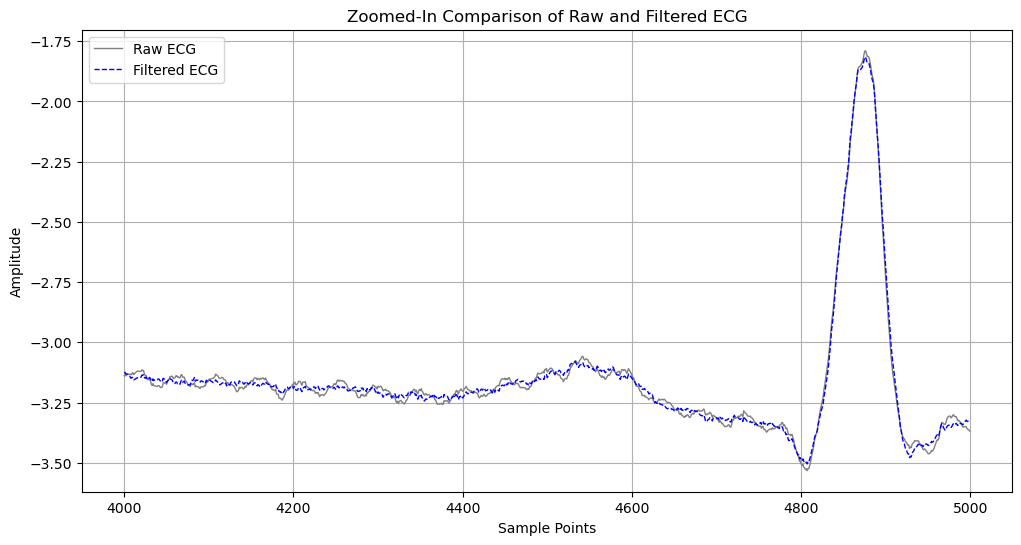

In [154]:
plt.figure(figsize=(12, 6))
zoom_range = slice(4000, 5000)  # Define the range for zooming (adjust as needed)

    
# Zoomed Region
plt.plot(k[zoom_range], x[zoom_range], lw=1.0, label="Raw ECG", color='gray')
plt.plot(k[zoom_range], ecg_filtered[zoom_range], lw=1.0, ls='--', label="Filtered ECG", color='blue')
plt.title("Zoomed-In Comparison of Raw and Filtered ECG")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [142]:
# Find the maximum amplitude of QRS peaks in raw and filtered signals
max_raw = np.max(x)  # Maximum QRS amplitude in raw signal
max_filtered_notch = np.max(ecg_filtered)  # Maximum QRS amplitude in filtered signal

# Calculate the reduction in amplitude
# Notch
print("")
print("Notch")
amplitude_reduction_filfitt = max_raw - max_filtered_notch # Compute the difference between the amplitudes.
amplitude_ratio_filfitt = max_filtered_notch / max_raw # Compute the ratio between the amplitudes

print(f"Maximum QRS amplitude (Raw Signal): {max_raw:.2f}")
print(f"Maximum QRS amplitude (Filtered Signal): {max_filtered_notch:.2f}")
print(f"Amplitude Reduction: {amplitude_reduction_filfitt:.2f}")
print(f"Amplitude Ratio: {amplitude_ratio_filfitt:.2f} (Expected ~1 for minimal reduction)")

print("")
print("Ideally, the amplitude ratio should be close to 1 (minimal reduction).")
print("A significant reduction might indicate over-filtering, which can distort the signal.")


Notch
Maximum QRS amplitude (Raw Signal): 1.00
Maximum QRS amplitude (Filtered Signal): 1.08
Amplitude Reduction: -0.08
Amplitude Ratio: 1.08 (Expected ~1 for minimal reduction)

Ideally, the amplitude ratio should be close to 1 (minimal reduction).
A significant reduction might indicate over-filtering, which can distort the signal.
